In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

# ================================
# Pelatihan dengan Vectorized Environment
# ================================

# Buat environment vectorized BipedalWalker-v3 (dengan 24 environment paralel)
env_train = make_vec_env("BipedalWalker-v3", n_envs=24, vec_env_cls=SubprocVecEnv)

# Definisikan hyperparameter PPO secara lengkap
ppo_params = {
    "learning_rate": 3e-4,      # Kecepatan pembelajaran
    "n_steps": 2048,            # Jumlah langkah per update
    "batch_size": 64,           # Ukuran batch untuk update
    "n_epochs": 10,             # Jumlah epoch per update
    "gamma": 0.99,              # Discount factor
    "gae_lambda": 0.95,         # Faktor lambda untuk Generalized Advantage Estimation
    "clip_range": 0.2,          # Batas clipping untuk policy update
    "ent_coef": 0.01,            # Koefisien entropy bonus (bisa dituning jika diperlukan eksplorasi lebih tinggi)
    "vf_coef": 0.5,             # Koefisien untuk loss value function
    "max_grad_norm": 0.5,       # Maksimum norm untuk gradient clipping
    "use_sde": False,           # Stochastic differential equations untuk eksplorasi
    "sde_sample_freq": -1,      # Frekuensi sampling untuk SDE (-1 berarti tidak digunakan)
}

# Buat model PPO dengan tensorboard logging
model = PPO(
    'MlpPolicy', 
    env_train, 
    device="cuda", 
    verbose=1, 
    tensorboard_log="./ppo_tensorboard/",  # Lokasi log TensorBoard
    **ppo_params
)

# Callback untuk menyimpan model secara berkala (setiap 100.000 timesteps)
checkpoint_callback = CheckpointCallback(
    save_freq=100000, 
    save_path='./ppo_bipedalwalker/',
    name_prefix='ppo_bipedalwalker'
)

# Mulai pelatihan model selama 1.000.000 timesteps dengan progress bar
model.learn(total_timesteps=1000000, progress_bar=True, callback=checkpoint_callback)

# Simpan model final
model.save("ppo_bipedalwalker_final")
print("Model telah disimpan sebagai ppo_bipedalwalker_final.zip")

# Tutup environment pelatihan
env_train.close()

# ================================
# Evaluasi Model dalam Mode Human
# ================================

# Buat environment baru dengan render_mode 'human' untuk melihat aksi secara real time
env_human = gym.make("BipedalWalker-v3", render_mode="human")
obs, info = env_human.reset()
done, truncated = False, False
total_reward = 0

while not (done or truncated):
    # Prediksi aksi berdasarkan observasi saat ini
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env_human.step(action)
    total_reward += reward
    # Render dilakukan secara otomatis karena render_mode="human"

print(f"Total Reward dalam mode human: {total_reward}")
env_human.close()


Using cuda device
Logging to ./ppo_tensorboard/PPO_7


Output()

c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 422      |
|    ep_rew_mean     | -112     |
| time/              |          |
|    fps             | 6579     |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 49152    |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 471         |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 2348        |
|    iterations           | 2           |
|    time_elapsed         | 41          |
|    total_timesteps      | 98304       |
| train/                  |             |
|    approx_kl            | 0.005130122 |
|    clip_fraction        | 0.0442      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | -0.00182    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.56        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.000999   |
|    std                  | 1           |
|    value_loss           | 56.9        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 626         |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 1944        |
|    iterations           | 3           |
|    time_elapsed         | 75          |
|    total_timesteps      | 147456      |
| train/                  |             |
|    approx_kl            | 0.005720226 |
|    clip_fraction        | 0.0581      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.65       |
|    explained_variance   | 0.76        |
|    learning_rate        | 0.0003      |
|    loss                 | 21.2        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.00101    |
|    std                  | 0.994       |
|    value_loss           | 12.3        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 839        |
|    ep_rew_mean          | -107       |
| time/                   |            |
|    fps                  | 1804       |
|    iterations           | 4          |
|    time_elapsed         | 108        |
|    total_timesteps      | 196608     |
| train/                  |            |
|    approx_kl            | 0.00906771 |
|    clip_fraction        | 0.114      |
|    clip_range           | 0.2        |
|    entropy_loss         | -5.6       |
|    explained_variance   | 0.882      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.71       |
|    n_updates            | 30         |
|    policy_gradient_loss | -0.000816  |
|    std                  | 0.982      |
|    value_loss           | 8.76       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 806         |
|    ep_rew_mean          | -103        |
| time/                   |             |
|    fps                  | 1684        |
|    iterations           | 5           |
|    time_elapsed         | 145         |
|    total_timesteps      | 245760      |
| train/                  |             |
|    approx_kl            | 0.009738044 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.54       |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.856       |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00118    |
|    std                  | 0.966       |
|    value_loss           | 4.73        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 961         |
|    ep_rew_mean          | -98.6       |
| time/                   |             |
|    fps                  | 1606        |
|    iterations           | 6           |
|    time_elapsed         | 183         |
|    total_timesteps      | 294912      |
| train/                  |             |
|    approx_kl            | 0.012731236 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.47       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.384       |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00227    |
|    std                  | 0.947       |
|    value_loss           | 8.22        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.05e+03    |
|    ep_rew_mean          | -92.9       |
| time/                   |             |
|    fps                  | 1567        |
|    iterations           | 7           |
|    time_elapsed         | 219         |
|    total_timesteps      | 344064      |
| train/                  |             |
|    approx_kl            | 0.011490791 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.37       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.84        |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.00377    |
|    std                  | 0.924       |
|    value_loss           | 3.49        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.24e+03    |
|    ep_rew_mean          | -87         |
| time/                   |             |
|    fps                  | 1553        |
|    iterations           | 8           |
|    time_elapsed         | 253         |
|    total_timesteps      | 393216      |
| train/                  |             |
|    approx_kl            | 0.011345384 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.3        |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.918       |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00402    |
|    std                  | 0.912       |
|    value_loss           | 2.36        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.27e+03    |
|    ep_rew_mean          | -80.9       |
| time/                   |             |
|    fps                  | 1534        |
|    iterations           | 9           |
|    time_elapsed         | 288         |
|    total_timesteps      | 442368      |
| train/                  |             |
|    approx_kl            | 0.010446668 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.24       |
|    explained_variance   | 0.907       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.576       |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00546    |
|    std                  | 0.896       |
|    value_loss           | 2.18        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | -75         |
| time/                   |             |
|    fps                  | 1527        |
|    iterations           | 10          |
|    time_elapsed         | 321         |
|    total_timesteps      | 491520      |
| train/                  |             |
|    approx_kl            | 0.009913175 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.18       |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.45        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0033     |
|    std                  | 0.878       |
|    value_loss           | 3.15        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.36e+03    |
|    ep_rew_mean          | -68         |
| time/                   |             |
|    fps                  | 1515        |
|    iterations           | 11          |
|    time_elapsed         | 356         |
|    total_timesteps      | 540672      |
| train/                  |             |
|    approx_kl            | 0.008664854 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.08       |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.077       |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00522    |
|    std                  | 0.864       |
|    value_loss           | 2.15        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.46e+03    |
|    ep_rew_mean          | -59.1       |
| time/                   |             |
|    fps                  | 1513        |
|    iterations           | 12          |
|    time_elapsed         | 389         |
|    total_timesteps      | 589824      |
| train/                  |             |
|    approx_kl            | 0.009103102 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.02       |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.238       |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.00781    |
|    std                  | 0.849       |
|    value_loss           | 0.534       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | -48.1       |
| time/                   |             |
|    fps                  | 1505        |
|    iterations           | 13          |
|    time_elapsed         | 424         |
|    total_timesteps      | 638976      |
| train/                  |             |
|    approx_kl            | 0.010388807 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.95       |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0471      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00775    |
|    std                  | 0.832       |
|    value_loss           | 0.874       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | -37.5       |
| time/                   |             |
|    fps                  | 1504        |
|    iterations           | 14          |
|    time_elapsed         | 457         |
|    total_timesteps      | 688128      |
| train/                  |             |
|    approx_kl            | 0.010438834 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.86       |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.182       |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0076     |
|    std                  | 0.814       |
|    value_loss           | 0.828       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.52e+03    |
|    ep_rew_mean          | -26.6       |
| time/                   |             |
|    fps                  | 1506        |
|    iterations           | 15          |
|    time_elapsed         | 489         |
|    total_timesteps      | 737280      |
| train/                  |             |
|    approx_kl            | 0.010100796 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.78       |
|    explained_variance   | 0.833       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.099       |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.00946    |
|    std                  | 0.8         |
|    value_loss           | 0.655       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.52e+03    |
|    ep_rew_mean          | -10.9       |
| time/                   |             |
|    fps                  | 1502        |
|    iterations           | 16          |
|    time_elapsed         | 523         |
|    total_timesteps      | 786432      |
| train/                  |             |
|    approx_kl            | 0.010984533 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.7        |
|    explained_variance   | 0.875       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.107       |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.00879    |
|    std                  | 0.783       |
|    value_loss           | 1.17        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | 3.97        |
| time/                   |             |
|    fps                  | 1496        |
|    iterations           | 17          |
|    time_elapsed         | 558         |
|    total_timesteps      | 835584      |
| train/                  |             |
|    approx_kl            | 0.011267678 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.62       |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.42        |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.00862    |
|    std                  | 0.769       |
|    value_loss           | 0.772       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.52e+03    |
|    ep_rew_mean          | 19.3        |
| time/                   |             |
|    fps                  | 1495        |
|    iterations           | 18          |
|    time_elapsed         | 591         |
|    total_timesteps      | 884736      |
| train/                  |             |
|    approx_kl            | 0.011573981 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.55       |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0711      |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.00759    |
|    std                  | 0.753       |
|    value_loss           | 1.13        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.52e+03   |
|    ep_rew_mean          | 33.8       |
| time/                   |            |
|    fps                  | 1495       |
|    iterations           | 19         |
|    time_elapsed         | 624        |
|    total_timesteps      | 933888     |
| train/                  |            |
|    approx_kl            | 0.01165804 |
|    clip_fraction        | 0.152      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.44      |
|    explained_variance   | 0.872      |
|    learning_rate        | 0.0003     |
|    loss                 | 11.4       |
|    n_updates            | 180        |
|    policy_gradient_loss | -0.00839   |
|    std                  | 0.735      |
|    value_loss           | 0.994      |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | 49.3        |
| time/                   |             |
|    fps                  | 1490        |
|    iterations           | 20          |
|    time_elapsed         | 659         |
|    total_timesteps      | 983040      |
| train/                  |             |
|    approx_kl            | 0.012481322 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.34       |
|    explained_variance   | 0.884       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.78        |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.00878    |
|    std                  | 0.717       |
|    value_loss           | 1.15        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.53e+03    |
|    ep_rew_mean          | 66.3        |
| time/                   |             |
|    fps                  | 1480        |
|    iterations           | 21          |
|    time_elapsed         | 697         |
|    total_timesteps      | 1032192     |
| train/                  |             |
|    approx_kl            | 0.012069262 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.25       |
|    explained_variance   | 0.87        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.086       |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00707    |
|    std                  | 0.7         |
|    value_loss           | 1.63        |
-----------------------------------------


Model telah disimpan sebagai ppo_bipedalwalker_final.zip
Total Reward dalam mode human: 119.34761047363281


In [3]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

model = PPO.load("ppo_bipedalwalker_final")

# Buat environment baru dengan render_mode 'human'
env_human = gym.make("BipedalWalker-v3", render_mode="human")
obs, info = env_human.reset()
done, truncated = False, False
total_reward = 0

while not (done or truncated):
    # Prediksi aksi berdasarkan observasi saat ini
    action, _states = model.predict(obs)
    obs, reward, done, truncated, info = env_human.step(action)
    total_reward += reward
    # env_human.render() sudah dilakukan secara otomatis dalam mode 'human'

print(f"Total Reward dalam mode human: {total_reward}")
env_human.close()


Total Reward dalam mode human: 122.26024627685547


In [ ]:
import gymnasium as gym
from LunarLander3DEnv.envs import LunarLander3DEnv
import torch.nn as nn
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

# ================================
# Pelatihan dengan Vectorized Environment
# ================================

# Buat environment vectorized LunarLander3DEnv-v0 (dengan 12 environment paralel)
env_train = make_vec_env("LunarLander3DEnv-v0", n_envs=8, vec_env_cls=DummyVecEnv)

# Definisikan hyperparameter PPO secara lengkap
ppo_params = {
    "learning_rate": 3e-4,      # Kecepatan pembelajarans
    "n_steps": 5000,            # Jumlah langkah per update
    "batch_size": 5000 * 8,     # Ukuran batch untuk update
    "n_epochs": 10,             # Jumlah epoch per update
    "gamma": 0.99,              # Discount factor
    "gae_lambda": 0.95,         # Faktor lambda untuk Generalized Advantage Estimation
    "clip_range": 0.5,          # Batas clipping untuk policy update
    "target_kl": 0.02,          # Target KL divergence untuk policy update
    "ent_coef": 0.01,           # Koefisien entropy bonus
    "vf_coef": 0.5,             # Koefisien untuk loss value function
    "max_grad_norm": 0.5,       # Maksimum norm untuk gradient clipping
    "use_sde": True,            # Stochastic differential equations untuk eksplorasi
    "sde_sample_freq": 32,      # Frekuensi sampling untuk SDE (-1 berarti tidak digunakan)
}

policy_kwargs = {
    "net_arch": [512,512],     # Jaringan saraf dengan 2 layer masing-masing 256 unit
}

# Buat model PPO dengan tensorboard logging
model = PPO(
    "MlpPolicy", 
    env_train, 
    device="cuda", 
    policy_kwargs=policy_kwargs,
    verbose=1,
    tensorboard_log="./ppo_lunar_tensorboard/",  # Lokasi log TensorBoard
    **ppo_params
)

# Callback untuk menyimpan model secara berkala (setiap 100.000 timesteps)
checkpoint_callback = CheckpointCallback(
    save_freq=10000, 
    save_path='./ppo_lunar/',
    name_prefix='ppo_lunar'
)

# Mulai pelatihan model selama 1.000.000 timesteps dengan progress bar
model.learn(total_timesteps=1000000, progress_bar=True, callback=checkpoint_callback)

# Simpan model final
model.save("ppo_lunar_final")
print("Model telah disimpan sebagai ppo_lunar.zip")

# Tutup environment pelatihan
env_train.close()

Using cuda device


c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Logging to ./ppo_lunar_tensorboard/PPO_74


Output()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.step_counter to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.step_counter` for environment variables or `env.get_wrapper_attr('step_counter')` that will search the reminding wrappers.
  logger.warn(


Episode 1: Total Reward = -6441.31


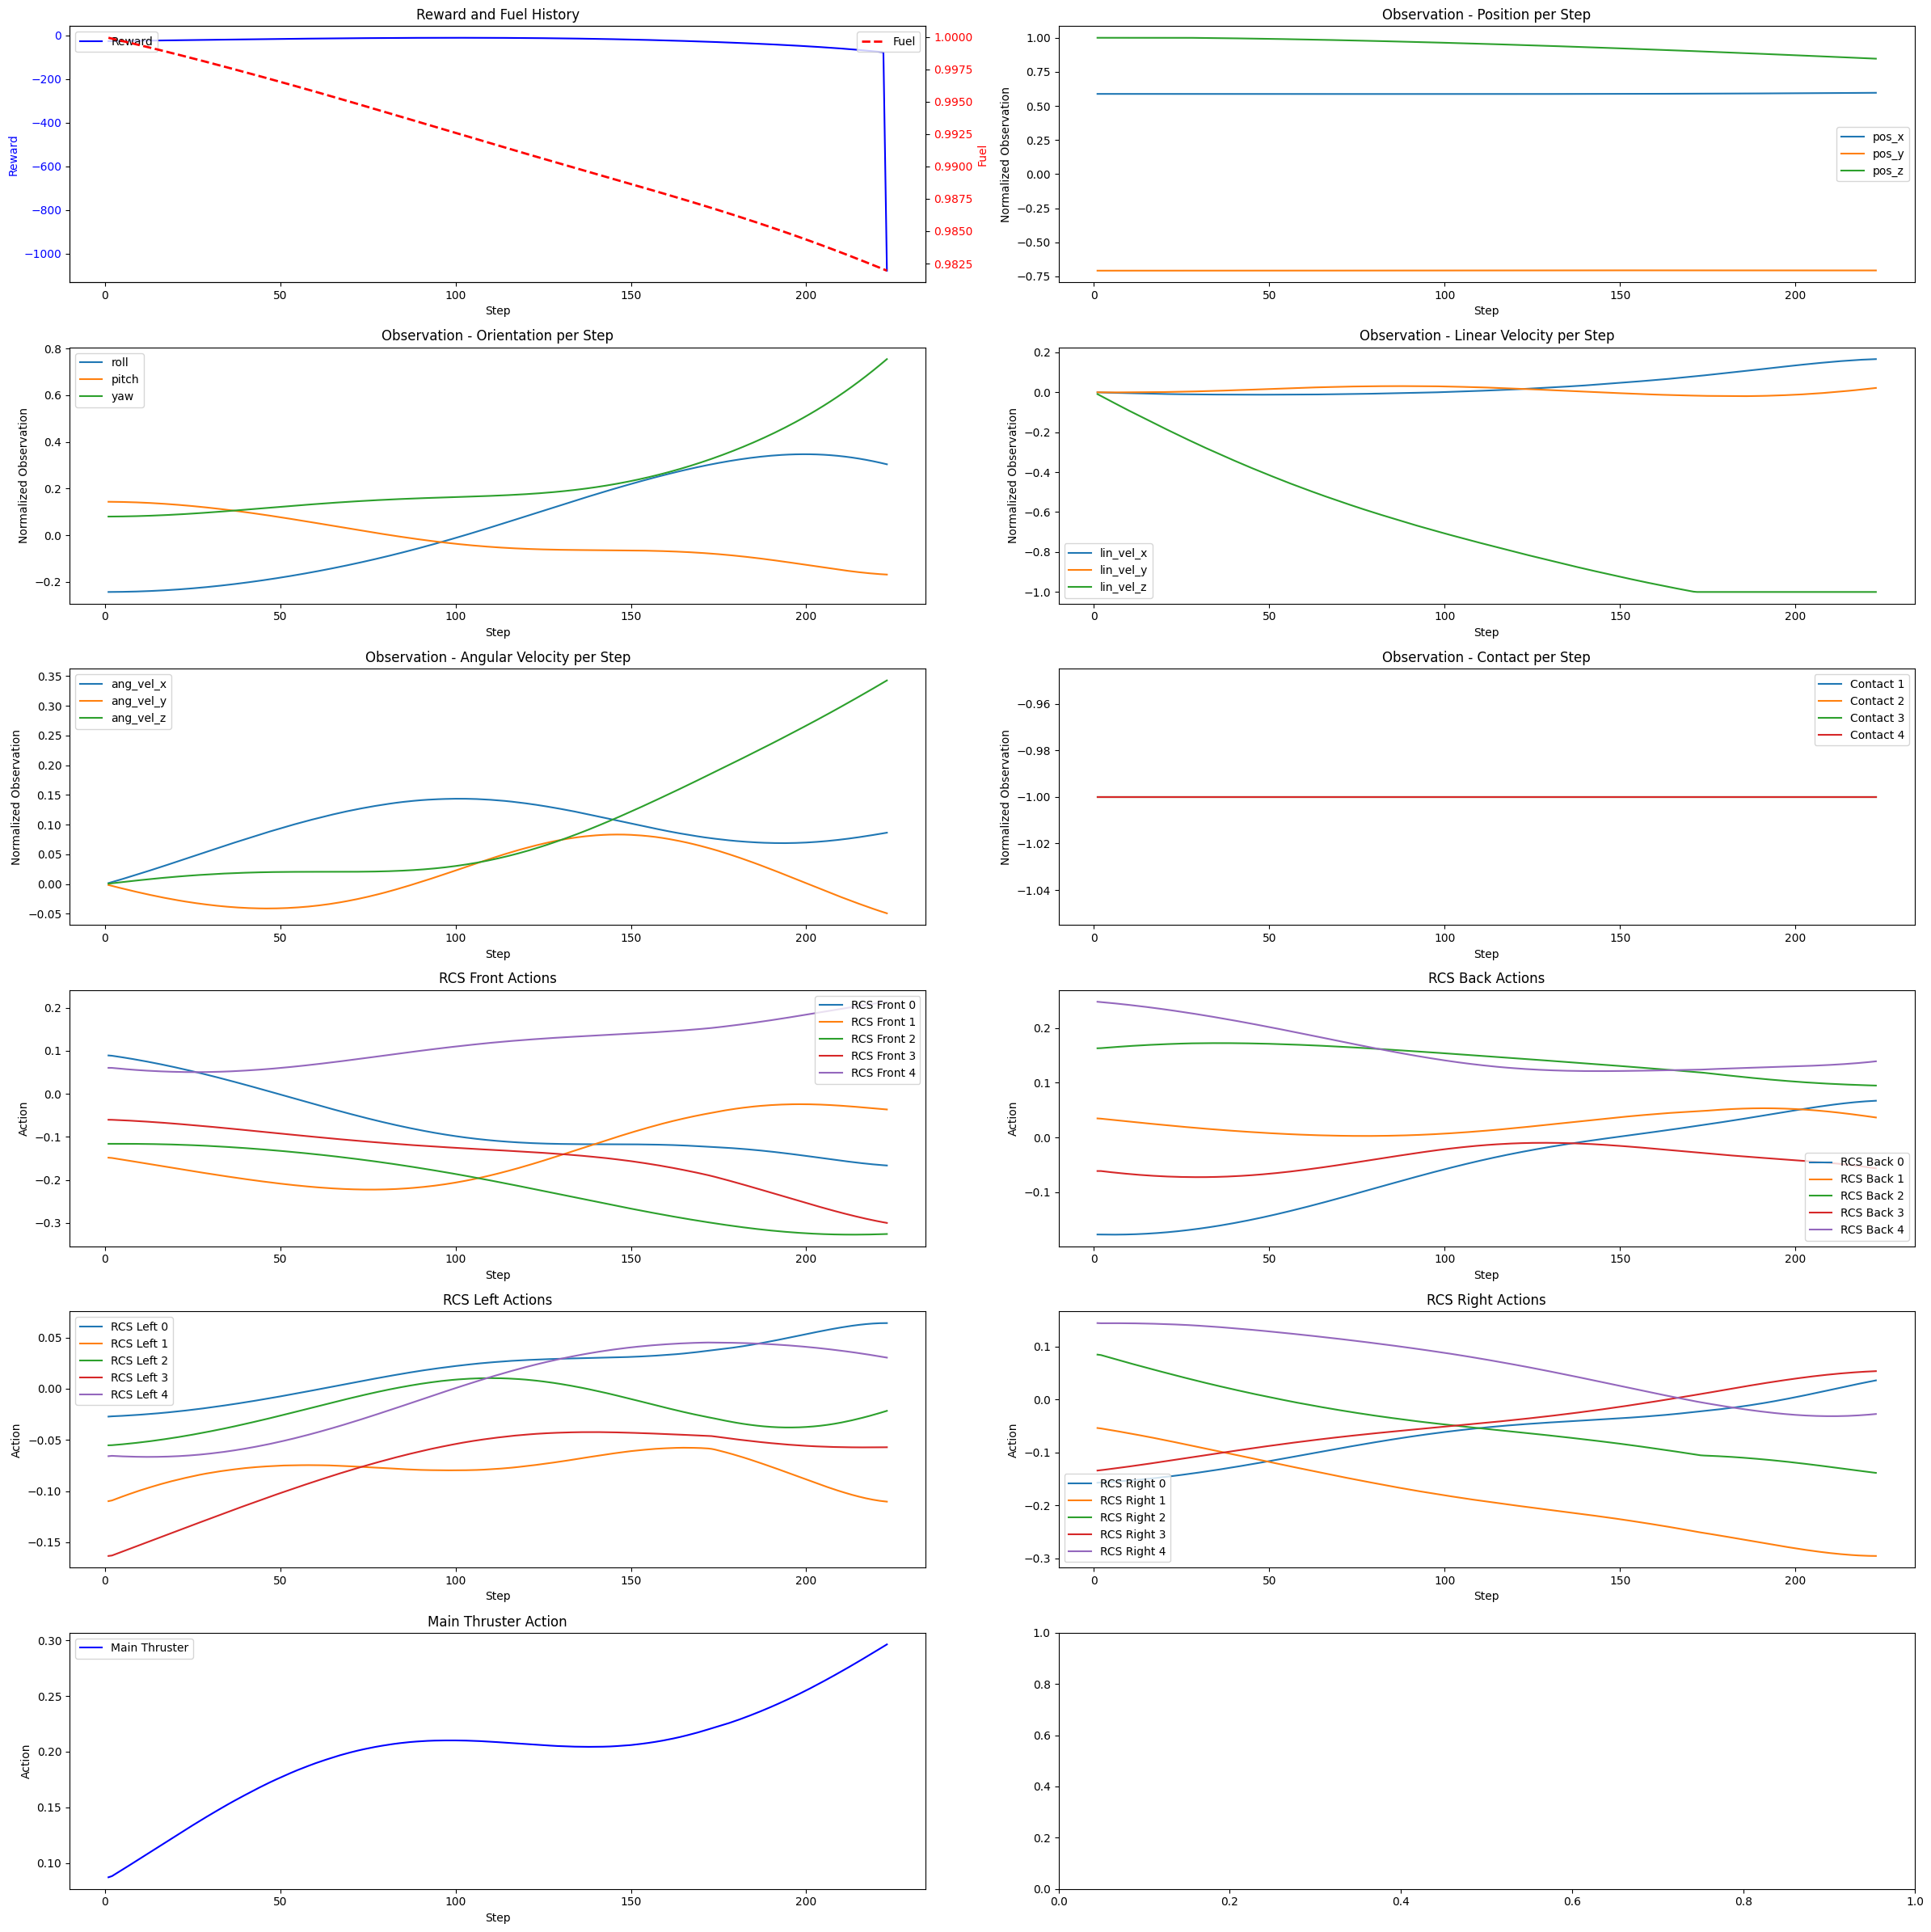

In [2]:
import gymnasium as gym
from LunarLander3DEnv.envs import LunarLander3DEnv
import time
import numpy as np
import matplotlib.pyplot as plt
# Pilih algoritma yang digunakan saat training, misal "PPO"
from stable_baselines3 import PPO

model_path = f"ppo_bipedalwalker_final"  # Nama file model yang telah disimpan

# Buat environment dengan render_mode "human" agar dapat melihat visualisasi
env = gym.make("LunarLander3DEnv-v0", render_mode="human")
model = PPO.load(model_path, env=env)


# Jalankan beberapa episode untuk inferensi
num_episodes = 1
for episode in range(1, num_episodes+1):
    obs, info = env.reset()
    done = False
    total_reward = 0.0
    obs_history = []
    action_history = []
    reward_history = []
    fuel_history = []
    step_history = []
    
    while not done:
        # Prediksi aksi dengan deterministik
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        
        action_history.append(action.copy())
        obs_history.append(obs.copy())
        reward_history.append(reward)
        fuel_history.append(obs[12])
        step_history.append(env.step_counter)

        total_reward += reward
        env.render()  # Pastikan render dipanggil agar kamera dan visualisasi diupdate
        #time.sleep(1/60)  # Optional: delay untuk melambatkan tampilan
        done = terminated or truncated
        #time.sleep(0.001)
    print(f"Episode {episode}: Total Reward = {total_reward:.2f}")

    env.close()

    obs_history = np.array(obs_history)
    action_history = np.array(action_history)
    reward_history = np.array(reward_history)
    fuel_history = np.array(fuel_history)
    step_history = np.array(step_history)
    
    # Plotting: Pisahkan grafik aksi menjadi 5 grafik
    fig, axs = plt.subplots(6, 2, figsize=(24, 24))
    
    # Plot 1: Reward dan Fuel over Steps
    ax = axs[0, 0]
    ax.plot(step_history, reward_history, 'b-', label='Reward')
    ax.set_xlabel('Step')
    ax.set_ylabel('Reward', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    axb = ax.twinx()
    axb.plot(step_history, fuel_history, 'r--', label='Fuel', linewidth=2)
    axb.set_ylabel('Fuel', color='r')
    axb.tick_params(axis='y', labelcolor='r')
    ax.set_title('Reward and Fuel History')
    ax.legend(loc='upper left'), axb.legend(loc='upper right')
    
    # Plot 2: Observations - Position
    obs_labels_pos = ["pos_x", "pos_y", "pos_z"]
    obs_subset_pos = obs_history[:, 0:3]
    for i in range(obs_subset_pos.shape[1]):
        axs[0, 1].plot(step_history, obs_subset_pos[:, i], label=obs_labels_pos[i])
    axs[0, 1].set_xlabel('Step')
    axs[0, 1].set_ylabel('Normalized Observation')
    axs[0, 1].set_title('Observation - Position per Step')
    axs[0, 1].legend()
    
    # Plot 3: Observations - Orientation
    obs_labels_ori = ["roll", "pitch", "yaw"]
    obs_subset_ori = obs_history[:, 3:6]
    for i in range(obs_subset_ori.shape[1]):
        axs[1, 0].plot(step_history, obs_subset_ori[:, i], label=obs_labels_ori[i])
    axs[1, 0].set_xlabel('Step')
    axs[1, 0].set_ylabel('Normalized Observation')
    axs[1, 0].set_title('Observation - Orientation per Step')
    axs[1, 0].legend()
    
    # Plot 4: Observations - Linear Velocity
    obs_labels_lin_vel = ["lin_vel_x", "lin_vel_y", "lin_vel_z"]
    obs_subset_lin_vel = obs_history[:, 6:9]
    for i in range(obs_subset_lin_vel.shape[1]):
        axs[1, 1].plot(step_history, obs_subset_lin_vel[:, i], label=obs_labels_lin_vel[i])
    axs[1, 1].set_xlabel('Step')
    axs[1, 1].set_ylabel('Normalized Observation')
    axs[1, 1].set_title('Observation - Linear Velocity per Step')
    axs[1, 1].legend()
    
    # Plot 5: Observations - Angular Velocity
    obs_labels_ang_vel = ["ang_vel_x", "ang_vel_y", "ang_vel_z"]
    obs_subset_ang_vel = obs_history[:, 9:12]
    for i in range(obs_subset_ang_vel.shape[1]):
        axs[2, 0].plot(step_history, obs_subset_ang_vel[:, i], label=obs_labels_ang_vel[i])
    axs[2, 0].set_xlabel('Step')
    axs[2, 0].set_ylabel('Normalized Observation')
    axs[2, 0].set_title('Observation - Angular Velocity per Step')
    axs[2, 0].legend()
    
    # Plot 6: Observations - Contact Sensors
    contact_labels = ["Contact 1", "Contact 2", "Contact 3", "Contact 4"]
    obs_subset_contact = obs_history[:, 13:17]
    for i in range(obs_subset_contact.shape[1]):
        axs[2, 1].plot(step_history, obs_subset_contact[:, i], label=contact_labels[i])
    axs[2, 1].set_xlabel('Step')
    axs[2, 1].set_ylabel('Normalized Observation')
    axs[2, 1].set_title('Observation - Contact per Step')
    axs[2, 1].legend()
    
    # Plot 7: Action History (Pisahkan menjadi 5 grafik)
    main_thruster_actions = action_history[:, 0]
    rcs_front_actions = action_history[:, 1:6]
    rcs_back_actions = action_history[:, 6:11]
    rcs_left_actions = action_history[:, 11:16]
    rcs_right_actions = action_history[:, 16:21]

    

    for i in range(rcs_front_actions.shape[1]):
        axs[3, 0].plot(step_history, rcs_front_actions[:, i], label=f'RCS Front {i}')
    axs[3, 0].set_xlabel("Step") 
    axs[3, 0].set_ylabel("Action")
    axs[3, 0].set_title("RCS Front Actions")
    axs[3, 0].legend()
    
    for i in range(rcs_back_actions.shape[1]):
        axs[3, 1].plot(step_history, rcs_back_actions[:, i], label=f'RCS Back {i}')
    axs[3, 1].set_xlabel("Step")
    axs[3, 1].set_ylabel("Action")
    axs[3, 1].set_title("RCS Back Actions")
    axs[3, 1].legend()
    
    for i in range(rcs_left_actions.shape[1]):
        axs[4, 0].plot(step_history, rcs_left_actions[:, i], label=f'RCS Left {i}')
    axs[4, 0].set_xlabel("Step")
    axs[4, 0].set_ylabel("Action")
    axs[4, 0].set_title("RCS Left Actions")
    axs[4, 0].legend()
    
    for i in range(rcs_right_actions.shape[1]):
        axs[4, 1].plot(step_history, rcs_right_actions[:, i], label=f'RCS Right {i}')
    axs[4, 1].set_xlabel("Step")
    axs[4, 1].set_ylabel("Action")
    axs[4, 1].set_title("RCS Right Actions")
    axs[4, 1].legend()
    

    axs[5, 0].plot(step_history, main_thruster_actions, label="Main Thruster", color='blue')
    axs[5, 0].set_xlabel("Step") 
    axs[5, 0].set_ylabel("Action")
    axs[5, 0].set_title("Main Thruster Action")
    axs[5, 0].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO

# Buat environment
env = gym.make("CartPole-v1")

# Direktori untuk menyimpan log TensorBoard
tensorboard_log_dir = "./tensorboard_logs/"

# Inisialisasi model PPO dengan konfigurasi minimal dan tensorboard logging
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=tensorboard_log_dir)

# Melatih model dengan total 10.000 timesteps
model.learn(total_timesteps=10000)

# Menyimpan model yang sudah terlatih
model.save("ppo_cartpole")

# Tutup environment
env.close()

# Untuk melihat log TensorBoard, jalankan perintah berikut di terminal:
# tensorboard --logdir=./tensorboard_logs


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./tensorboard_logs/PPO_1


c:\Users\User\anaconda3\envs\robot_sim\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | 22       |
| time/              |          |
|    fps             | 779      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.8        |
|    ep_rew_mean          | 26.8        |
| time/                   |             |
|    fps                  | 576         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009080269 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00362     |
|    learning_rate        | 0.

In [ ]:
import os
import gymnasium as gym
from LunarLander3DEnv.envs import LunarLander3DEnv  # Pastikan package sudah terinstal dan path sudah sesuai
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.wrappers import RecordEpisodeStatistics

# Direktori untuk logging dan tensorboard
tensorboard_log_dir = "./tensorboard/"
os.makedirs(tensorboard_log_dir, exist_ok=True)

def make_env():
    # Buat environment dan bungkus dengan RecordEpisodeStatistics untuk mendapatkan statistik episode
    env = gym.make("LunarLander3DEnv-v0", render_mode=None)
    env = RecordEpisodeStatistics(env)
    return env

# Buat vectorized environment dengan satu instance
env = DummyVecEnv([make_env])

# Inisialisasi model PPO dengan logging ke TensorBoard
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    tensorboard_log=tensorboard_log_dir,
)

# Pelatihan sederhana selama 10.000 langkah
model.learn(total_timesteps=10000)

# Simpan model yang sudah dilatih
model.save("ll3d_ppo_simple")

env.close()

# Untuk melihat log TensorBoard, jalankan di terminal:
# tensorboard --logdir=./tensorboard/


Episode 1 selesai dengan total reward: 620.0
Episode 2 selesai dengan total reward: 267.0
Episode 3 selesai dengan total reward: 754.0
Episode 4 selesai dengan total reward: 674.0
Episode 5 selesai dengan total reward: 741.0
Episode 6 selesai dengan total reward: 791.0
Episode 7 selesai dengan total reward: 325.0
Episode 8 selesai dengan total reward: 292.0
Episode 9 selesai dengan total reward: 823.0
Episode 10 selesai dengan total reward: 572.0


In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO

# Buat environment LunarLander-v2 (discrete action space)
env = gym.make("LunarLander-v2")

# Direktori untuk menyimpan log TensorBoard
tensorboard_log_dir = "./tensorboard_logs/"

# Inisialisasi model PPO dengan MlpPolicy
model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    tensorboard_log=tensorboard_log_dir,
    device="cpu"  # Menggunakan CPU untuk menghindari warning GPU pada policy MLP
)

# Melatih model selama 100.000 timesteps (ubah sesuai kebutuhan)
model.learn(total_timesteps=100000)

# Simpan model yang sudah terlatih
model.save("ppo_lunarlander_v2")

# Tutup environment
env.close()

# Untuk melihat log TensorBoard, jalankan perintah berikut di terminal:
# tensorboard --logdir=./tensorboard_logs


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./tensorboard_logs/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 86.2     |
|    ep_rew_mean     | -199     |
| time/              |          |
|    fps             | 1206     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 92.1        |
|    ep_rew_mean          | -210        |
| time/                   |             |
|    fps                  | 1228        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009260142 |
|    clip_fraction        | 0.0454      |
|    clip_range           

In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO

# Muat model PPO yang sudah dilatih (pastikan file model "ppo_lunarlander_v2.zip" ada)
model = PPO.load("ppo_lunarlander_v2", device="cpu")

# Buat environment dengan render_mode 'human' untuk visualisasi langsung
env = gym.make("LunarLander-v2", render_mode="human")

num_episodes = 5  # Jumlah episode inferensi

for episode in range(num_episodes):
    obs, info = env.reset()  # Pada Gymnasium, reset() mengembalikan (observation, info)
    done = False
    total_reward = 0
    while not done:
        # Prediksi aksi dengan deterministik untuk hasil konsisten
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        # Cek jika episode selesai
        done = terminated or truncated
    print(f"Episode {episode+1} selesai dengan total reward: {total_reward}")

env.close()


Episode 1 selesai dengan total reward: -15.397978836489495
Episode 2 selesai dengan total reward: -4.676358847978989
Episode 3 selesai dengan total reward: 1.634223930071005
Episode 4 selesai dengan total reward: 11.917275143853487
Episode 5 selesai dengan total reward: -21.759360888156134
